<a href="https://colab.research.google.com/github/I-gW-23-27/Skript/blob/main/docs/230912/Strassenplatten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LEGO Strassenplatten

Die folgenden Aufgaben basieren auf der Übung
["Strassenplatten"](https://pytamaro.si.usi.ch/activities/luce/street-plates/de/v1)
von PyTamaro.

Es geht darum, die bekannten LEGO Strassenplatten zu zeichnen.

![LEGO Strassenplatten](https://github.com/I-gW-23-27/Skript/blob/main/docs/images/6-lego-strassenplatten.jpeg?raw=1)

Für die folgenden Übungen gehen wir von vier Typen von Strassenplatten
aus:
Geraden, Kurven, Abzweigungen und Kreuzungen.

Es geht dabei darum, Funktionen zu entwickeln, um die vier Arten von
Strassenplatten effizient zu zeichnen.

Eine Funktion ist ein Programmteil, der Befehle so bündelt, dass sie
innerhalb eines Programmes wiederholt verwendet werden können.
Funktionen berechnen Resultate aus Parameteren, die ihnen als Input
übergeben werden.

Das folgende Beispiel zeigt eine Funktion, welche in Anwendung des
Satzes von Pythagoras aus zwei gegebenen Katheten die Hypothenuse
berechnet.

```Python
def pythagoras(a, b):
    c = (a ** 2 + b ** 2) ** (1/2)
    return c
```

Was für mathematische Formeln möglich ist, ist auch für Grafiken möglich.

Die erforderlichen Angaben bezüglich der Dimensionierung der Platten können der
folgenden Abbildung entnommen werden. Die Einheit für die Vermessung
sind die LEGO-typischen Noppen.

![Dimensionen Strassenplatten](https://github.com/I-gW-23-27/Skript/blob/main/docs/images/dimensionen_strassenplatten.png?raw=1)

In der folgenden Zelle werden die erforderlichen Funktionen aus PyTamaro
importiert und die spezifischen Farben sowie eine sinnvolle Noppengrösse
definiert.

## Installation von PyTamaro in Google Colab

Damit PyTamaro in Google Colab verwendet werden kann, muss zuerst die folgende Zelle ausgeführt werden.

In [1]:
! pip install pytamaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 11.8 MB/s eta 0:00:00


In [2]:
from pytamaro.de import(
    Grafik, Farbe,
    weiss, gelb, rot, rgb_farbe, transparent,
    kreis_sektor, rechteck, ellipse, leere_grafik,
    ueberlagere, ueber, neben, fixiere, kombiniere, drehe,
    unten_links, unten_mitte,
    zeige_grafik,
)

RASEN_FARBE = rgb_farbe(0, 203, 109)
STRASSEN_FARBE = rgb_farbe(140, 140, 140)
RANDSTREIFEN_FARBE = gelb
MITTELSTREIFEN_FARBE = weiss

NOPPENGROESSE = 5

## Gerade

Die Gerade kann aus mehreren Rechtecken zusammengesetzt werden.

Sobald Sie eine Platte mit einer geraden Strasse (wie abgebildet)
gezeichnet haben, können Sie diese auch um 90° drehen, um so ein
vertikales Strassensegment zu erhalten.

![Gerade Strasse](https://github.com/I-gW-23-27/Skript/blob/main/docs/images/gerade_strasse.png?raw=1)

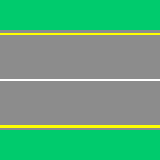

In [3]:
def gerade(noppengroesse: float) -> Grafik:
    plattengroesse = noppengroesse * 32 # Platte ist 32*32 Noppen gross
    streifenbreite = noppengroesse * 0.5

    def streifen(dicke : float, farbe : Farbe) -> Grafik:
        return rechteck(plattengroesse, dicke, farbe)

    rasen          = streifen(noppengroesse * 6, RASEN_FARBE)
    fahrbahn       = streifen(noppengroesse * 18, STRASSEN_FARBE)
    teerstreifen   = streifen(streifenbreite, STRASSEN_FARBE)
    randstreifen   = streifen(streifenbreite, RANDSTREIFEN_FARBE)
    mittelstreifen = streifen(streifenbreite, weiss)

    fahrban_mit = ueberlagere(mittelstreifen, fahrbahn)

    platte = ueber(teerstreifen, rasen)
    platte = ueber(randstreifen, platte)
    platte = ueber(fahrban_mit,  platte)
    platte = ueber(randstreifen, platte)
    platte = ueber(teerstreifen, platte)
    platte = ueber(rasen,        platte)

    return platte

zeige_grafik(gerade(NOPPENGROESSE))

## Kurve

Um die Kurve zu zeichnen, überlagern Sie Kreissektoren mit verschiedenen
Farben und Radien und fixieren diese in einer Ecke. Anstatt
[`ueberlagere()`](https://pytamaro.readthedocs.io/en/stable/German/operations.html#pytamaro.de.operations.ueberlagere)
verwenden Sie dazu
[`fixiere()`](https://pytamaro.readthedocs.io/en/stable/German/operations.html#pytamaro.de.operations.fixiere)
und
[`kombiniere()`](https://pytamaro.readthedocs.io/en/stable/German/operations.html#pytamaro.de.operations.kombiniere).

![Kurve](https://github.com/I-gW-23-27/Skript/blob/main/docs/images/kurve.png?raw=1)

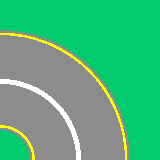

In [4]:
def kurve(noppengroesse: float) -> Grafik:
    plattengroesse = noppengroesse * 32
    hintergrund = fixiere(unten_links, rechteck(plattengroesse, plattengroesse, RASEN_FARBE))

    rasen_innen         = fixiere(unten_links, kreis_sektor(noppengroesse * 6,     90, RASEN_FARBE))
    teerstreifen_innen  = fixiere(unten_links, kreis_sektor(noppengroesse * 6.5,   90, STRASSEN_FARBE))
    randstreifen_innen  = fixiere(unten_links, kreis_sektor(noppengroesse * 7,     90, RANDSTREIFEN_FARBE))
    fahrban_innen       = fixiere(unten_links, kreis_sektor(noppengroesse * 15.25, 90, STRASSEN_FARBE))
    mittellinie         = fixiere(unten_links, kreis_sektor(noppengroesse * 16.25, 90, weiss))
    fahrbahn_aussen     = fixiere(unten_links, kreis_sektor(noppengroesse * 25,    90, STRASSEN_FARBE))
    randstreifen_aussen = fixiere(unten_links, kreis_sektor(noppengroesse * 25.5,  90, RANDSTREIFEN_FARBE))
    teerstreifen_aussen = fixiere(unten_links, kreis_sektor(noppengroesse * 26,    90, STRASSEN_FARBE))

    platte = kombiniere(rasen_innen, teerstreifen_innen)
    platte = kombiniere(platte, randstreifen_innen)
    platte = kombiniere(platte, fahrban_innen)
    platte = kombiniere(platte, mittellinie)
    platte = kombiniere(platte, fahrbahn_aussen)
    platte = kombiniere(platte, randstreifen_aussen)
    platte = kombiniere(platte, teerstreifen_aussen)
    platte = kombiniere(platte, hintergrund)

    return platte

zeige_grafik(kurve(NOPPENGROESSE))

## Kreuzung

Es gibt verschiedene Möglichkeiten, die Kreuzung aus einfacheren Teilen
zu "komponieren". Wenn Sie die Grafik geschickt zerlegen, können Sie
Teile davon für die Abzweigung wiederverwenden.

![Kreuzung](https://github.com/I-gW-23-27/Skript/blob/main/docs/images/kreuzung.png?raw=1)

## Wiederholungen in Python

Quadratzahlen von 20 bis 40 als Beispiel.

In [ ]:
for x in range(20,41):
  print(x ** 2)

400
441
484
529
576
625
676
729
784
841
900
961
1024
1089
1156
1225
1296
1369
1444
1521
1600


In [5]:
def fussgaengerstreifen(noppengroesse : float) -> Grafik:
    streifen = rechteck(noppengroesse, noppengroesse * 5, weiss)
    zwischenraum = rechteck(noppengroesse , noppengroesse * 5, transparent)
    abschluss =  rechteck(noppengroesse * 0.25, noppengroesse * 5, transparent)
    kombi = abschluss

    for i in range(17):
        if i % 2 == 0:
            kombi = neben(kombi, streifen)
        else:
            kombi = neben(kombi, zwischenraum)

    kombi = neben(kombi, abschluss)

    return kombi

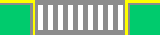

In [6]:
def einmuendung(noppengroesse : float) -> Grafik:
    rasen = fixiere(unten_links, rechteck(noppengroesse * 6, noppengroesse * 6, RASEN_FARBE))
    teerstreifen = fixiere(unten_links, rechteck(noppengroesse * 6.5, noppengroesse * 6.5, STRASSEN_FARBE))
    randstreifen = fixiere(unten_links, rechteck(noppengroesse * 7, noppengroesse * 7, RANDSTREIFEN_FARBE))
    ecke = kombiniere(rasen, teerstreifen)
    ecke = kombiniere(ecke, randstreifen)

    strassenabschnitt = rechteck(noppengroesse * 18, noppengroesse * 7, STRASSEN_FARBE)
    streifen = fussgaengerstreifen(noppengroesse)
    strassenabschnitt = ueberlagere(streifen, strassenabschnitt)
    kombi = neben(ecke, strassenabschnitt)
    kombi = neben(kombi, drehe(90, ecke))
    return kombi

zeige_grafik(einmuendung(NOPPENGROESSE))

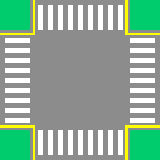

In [7]:
def kreuzung(noppengroesse: float) -> Grafik:
    mitte = rechteck(noppengroesse * 18, noppengroesse * 18, STRASSEN_FARBE)
    rand_unten = einmuendung(noppengroesse)
    rand_links = drehe(270, rand_unten)

    rand_unten_fix = fixiere(unten_links, rand_unten)
    rand_links_fix = fixiere(unten_links, rand_links)
    eins = kombiniere(rand_links_fix, rand_unten_fix)
    zwei = drehe(180, eins)
    zwei_fix = fixiere(unten_links, zwei)

    rahmen = kombiniere(eins, zwei_fix)

    platte = ueberlagere(mitte, rahmen)
    return platte

zeige_grafik(kreuzung(NOPPENGROESSE))

## Abzweigung

Die Abzweigung hat Gemeinsamkeiten mit der Geraden und mit der Kreuzung.

![Abzweigung](https://github.com/I-gW-23-27/Skript/blob/main/docs/images/abzweigung.png?raw=1)

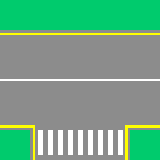

In [8]:
def abzweigung(noppengroesse: float) -> Grafik:
    gerade_strasse = fixiere(unten_links, gerade(noppengroesse))
    einmuendungselement = fixiere(unten_links, einmuendung(noppengroesse))

    platte = kombiniere(einmuendungselement, gerade_strasse)
    return platte


zeige_grafik(abzweigung(NOPPENGROESSE))

[Hier geht es zurück zur Übersicht](https://i-gw-23-27.github.io/Skript/)